## CSCA 5622 Final Project: Horse Colic Survival Rate

### Introduction
Colic is a vetenary term that refers to abdominal pain in horses.  This is a potentially serious condition that could result in death for the animal.  The goal of this project is to create a machine learning classification model that can accurately predict whether a horse will survive or die, based on a number of factors.

#### Why?
On a personal level, I believe that healthcare is one of the most exciting areas of application for machine learning models, hence the motivation for this kind of project.  As we'll see below, the dataset we'll be using is an interesting balance of being both easily understandable, but not immediately obvious what the outcome will be.  From a self-learning perspective, I'll be happy if this exercise results in a model that predicts better than random chance, but I'm certain it will be a worthwhile exercise and practice in employeeing foundational ML techniques.

### Data
_UC Irvine Machine Learning Repository. (n.d.). Horse Colic Database. Retrieved from https://archive.ics.uci.edu/dataset/47/horse+colic_

The dataset we'll be using is from the UC Irvine Machine Learning Repository.  It was donated in 1989.  This is a relatively small database, only 15KB zipped.  It contains 368 instances with 28 attributes/features (including continuous, discrete, and nominal values).  Below is a description of all provided features:

#### Features

1. surgery?
* 1 = Yes, it had surgery
* 2 = It was treated without surgery

2. age
* 1 = Adult horse
* 2 = Young (< 6 months)

3. hospital Number: Numeric id. The case number assigned to the horse (may not be unique if the horse is treated > 1 time)

4. rectal temperature: Linear, in degrees celsius. An elevated temp may occur due to infection. Temperature may be reduced when the animal is in late shock. Normal temp is 37.8, this parameter will usually change as the problem progresses, eg. may start out normal, then become elevated because of the lesion, passing back through the normal range as the horse goes into shock

5. pulse: Linear. The heart rate in beats per minute is a reflection of the heart condition: 30 -40 is normal for adults rare to have a lower than normal rate although athletic horses may have a rate of 20-25, animals with painful lesions or suffering from circulatory shock may have an elevated heart rate

6. respiratory rate: Linear.  Normal rate is 8 to 10.  Usefulness is doubtful due to the great fluctuations

7. temperature of extremities: A subjective indication of peripheral circulation. Cool to cold extremities indicate possible shock.  Hot extremities should correlate with an elevated rectal temp.
* 1 = Normal
* 2 = Warm
* 3 = Cool
* 4 = Cold

8. peripheral pulse: Subjective.  Normal or increased p.p. are indicative of adequate circulation while reduced or absent indicate poor perfusion
* 1 = normal
* 2 = increased
* 3 = reduced
* 4 = absent

9. mucous membranes: A subjective measurement of color.  1 and 2 probably indicate a normal or slightly increased circulation, 3 may occur in early shock, 4 and 6 are indicative of serious circulatory compromise, 5 is more indicative of a septicemia
* 1 = normal pink
* 2 = bright pink
* 3 = pale pink
* 4 = pale cyanotic
* 5 = bright red / injected
* 6 = dark cyanotic

10. capillary refill time: A clinical judgement. The longer the refill, the poorer the circulation
* 1 = < 3 seconds 
* 2 = >= 3 seconds

11. pain: A subjective judgement of the horse's pain level.  According to uploader, this should NOT be treated as a ordered or discrete variable, but we will evaluate. In general, the more painful, the more likely it is to require surgery. Prior treatment of pain may mask the pain level to some extent
* 1 = alert, no pain
* 2 = depressed
* 3 = intermittent mild pain
* 4 = intermittent severe pain
* 5 = continuous severe pain

12. peristalsis: An indication of the activity in the horse's gut. As the gut becomes more distended or the horse becomes more toxic, the activity decreases
* 1 = hypermotile
* 2 = normal
* 3 = hypomotile
* 4 = absent

13. abdominal distension: An IMPORTANT parameter. An animal with abdominal distension is likely to be painful and have reduced gut motility. A horse with severe abdominal distension is likely to require surgery just tio relieve the pressure
* 1 = none
* 2 = slight
* 3 = moderate
* 4 = severe

14. nasogastric tube: This refers to any gas coming out of the tube. A large gas cap in the stomach is likely to give the horse discomfort
* 1 = none
* 2 = slight
* 3 = significant

15. nasogastric reflux: The greater amount of reflux, the more likelihood that there is some serious obstruction to the fluid passage from the rest of the intestine
* 1 = none
* 2 = > 1 liter
* 3 = < 1 liter

16. nasogastric reflux PH: Linear. Scale is from 0 to 14 with 7 being neutral. Normal values are in the 3 to 4 range

17. rectal examination - feces: Absent feces probably indicates an obstruction
* 1 = normal
* 2 = increased
* 3 = decreased
* 4 = absent

18. abdomen: 3 is probably an obstruction caused by a mechanical impaction and is normally treated medically.  4 and 5 indicate a surgical lesion
* 1 = normal
* 2 = other
* 3 = firm feces in the large intestine
* 4 = distended small intestine
* 5 = distended large intestine

19. packed cell volume: Linear, the # of red cells by volume in the blood. Normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated.

20. total protein: Linear, normal values lie in the 6-7.5 (gms/dL) range, the higher the value the greater the dehydration

21. abdominocentesis appearance: A needle is put in the horse's abdomen and fluid is obtained from the abdominal cavity. Normal fluid is clear while cloudy or serosanguinous indicates a compromised gut
* 1 = clear
* 2 = cloudy
* 3 = serosanguinous

22. abdomcentesis total protein: Linear. The higher the level of protein the more likely it is to have a compromised gut. Values are in gms/dL

23. outcome (target): What eventually happened to the horse? Possible values:
* 1 = lived
* 2 = died
* 3 = was euthanized

24. surgical lesion?: Retrospectively, was the problem (lesion) surgical? All cases are either operated upon or autopsied so that this value and the lesion type are always known. Possible values:
* 1 = Yes
* 2 = No

25. type of lesion
* First number is site of lesion
    * 1 = gastric
    * 2 = sm intestine
    * 3 = lg colon
    * 4 = lg colon and cecum
    * 5 = cecum
    * 6 = transverse colon
    * 7 = retum/descending colon
    * 8 = uterus
    * 9 = bladder
    * 11 = all intestinal sites
    * 00 = none
* second number is type
    * 1 = simple
    * 2 = strangulation
    * 3 = inflammation
    * 4 = other
* third number is subtype
    * 1 = mechanical
    * 2 = paralytic
    * 0 = n/a
* fourth number is specific code
    * 1 = obturation
    * 2 = intrinsic
    * 3 = extrinsic
    * 4 = adynamic
    * 5 = volvulus/torsion
    * 6 = intussuption
    * 7 = thromboembolic
    * 8 = hernia
    * 9 = lipoma/slenic incarceration
    * 10 = displacement
    * 0 = n/a

26. type of lesion (same as 25)
27. type of lesion (same as 26)

28. cp_data: Is pathology data present for this case? According to data provider, this variable is of no significance since pathology data is not included or collected for these cases
* 1 = Yes
* 2 = No

#### Data Import

In [474]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# set max columns for better summary output
pd.set_option('display.max_columns', None)

# List the data columns, renaming variables where appropriate to make analysis more intuitive.  List index commented on right
column_names = [
    'surgery', # [0]
    'age', # [1]
    'hospital_num', # [2]
    'rectal_temp', # [3]
    'pulse', # [4]
    'respiratory_rate', # [5]
    'extremities_temp', # [6]
    'peripheral_pulse', # [7]
    'mucous_membranes', # [8]
    'capillary_refill_time', # [9]
    'pain', # [10]
    'peristalsis', # [11]
    'abdominal_distension', # [12]
    'nasogastric_tube', # [13]
    'nasogastric_reflux', # [14]
    'nasogastric reflux', # [15]
    'feces', # [16]
    'abdomen', # [17]
    'packed_cell_volume', # [18]
    'total_protein', # [19]
    'abdominocentesis_appearance', # [20]
    'abdomcentesis_total_protein', # [21]
    'outcome', # [22]
    'surgical_lesion', # [23]
    'lesion_type1', # [24]
    'lesion_type2', # [25]
    'lesion_type3', # [26]
    'cp_data' # [27]
]

# Data came pre-split into test and training files.  Importing and combining them here so we can conduct our own split
horse_colic_data = pd.read_csv('./data/horse-colic.data', sep='\s+', header=None, names=column_names)
horse_colic_test = pd.read_csv('./data/horse-colic.test', sep='\s+', header=None, names=column_names)
df = pd.concat([horse_colic_data, horse_colic_test], ignore_index=True)

df.head()

,surgery,age,hospital_num,rectal_temp,pulse,respiratory_rate,extremities_temp,peripheral_pulse,mucous_membranes,capillary_refill_time,pain,peristalsis,abdominal_distension,nasogastric_tube,nasogastric_reflux,nasogastric reflux,feces,abdomen,packed_cell_volume,total_protein,abdominocentesis_appearance,abdomcentesis_total_protein,outcome,surgical_lesion,lesion_type1,lesion_type2,lesion_type3,cp_data
0,2,1,530101,38.50,66,28,3,3,?,2,5,4,4,?,?,?,3,5,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,3,4,2,?,?,?,4,2,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,3,3,1,?,?,?,1,1,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,2,4,4,1,2,5.00,3,?,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,?,?,?,?,?,?,?,?,74.00,7.40,?,?,2,2,4300,0,0,2


##### Data Cleanup
The dataset reportedly has 30% missing values.  Furthermore there are a number of fields that will need to be transformed to dropped.  Let's start by importing and doing that cleanup with explanations below:

In [475]:
# Convert columns from objects to numeric values:
# Note: lesion_type1-3 are coded numerical strings,
# but we'll explain later why it's okay to convert these to numerical
print(df.shape)
df.head()
for column in column_names:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Remove rows where our target column "outcome" is null
df = df.dropna(subset=['outcome'])

# Remove columns that have too many null values
missing_values_threshold = 0.8
total_rows = len(df)
min_required_rows = total_rows * missing_values_threshold
cols_to_drop = [col for col in df.columns if df[col].count() < min_required_rows]
df = df.drop(columns=cols_to_drop)

# Remove columns that are clearly useless, or for adminstrative purposes only
useless_cols = [
    'hospital_num', # administrative
    'cp_data', # meaningless
    'lesion_type2', # almost always 00000
    'lesion_type3' # almost always 00000
]

df = df.drop(columns=useless_cols)

# Next there are binary features that we should convert into a 0 or 1 value, for the sake of consistency, and clarity
# Let's trying imputing all of these with the mode of the column to fill the relatively few missing values
df['had_surgery'] = df['surgery'].map({1: 1, 2: 0}).astype(bool)
df['had_surgery'] = df['had_surgery'].fillna(df['had_surgery'].mode()[0])
df = df.drop(columns='surgery')

df['is_adult'] = df['age'].map({1: 1, 9: 0}).astype(bool) # Documentation appears to be wrong.  Values are 1 or 9
df['is_adult'] = df['is_adult'].fillna(df['is_adult'].mode()[0])
df = df.drop(columns='age')

# Including euthanized cases, as this suggests condition of horse was severe enough that death was likely inevitable
df['survived'] = df['outcome'].map({1: 1, 2: 0, 3: 0}).astype(bool)
df['survived'] = df['survived'].fillna(df['survived'].mode()[0])
df = df.drop(columns='outcome')

df['surgical_lesion'] = df['surgical_lesion'].map({1: 1, 2: 0}).astype(bool)
df['surgical_lesion'] = df['surgical_lesion'].fillna(df['surgical_lesion'].mode()[0])

df['long_capillary_refill_time'] = df['capillary_refill_time'].map({1: 0, 2: 1}).astype(bool)
df['long_capillary_refill_time'] = df['long_capillary_refill_time'].fillna(df['long_capillary_refill_time'].mode()[0])
df = df.drop(columns='capillary_refill_time')

# lesion_type1, lesion_type2, and lesion_type3 have unclear/confusing descriptions. 
# There are not enough digits to represent all permutations of the lesion types in the provided documentation.
# However, a value of "00000" seems to at least equate to "none".  
# So, we can convert this into a binary field, where 0 = "no lesion", and > 0 means "lesion exists"

df['has_lesion'] = df['lesion_type1'] != 0
df = df.drop(columns='lesion_type1')

df.info(verbose=True, show_counts=True)
df.head()

(368, 28)
<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 367
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rectal_temp                 297 non-null    float64
 1   pulse                       340 non-null    float64
 2   respiratory_rate            295 non-null    float64
 3   extremities_temp            302 non-null    float64
 4   mucous_membranes            318 non-null    float64
 5   pain                        303 non-null    float64
 6   peristalsis                 315 non-null    float64
 7   abdominal_distension        302 non-null    float64
 8   packed_cell_volume          330 non-null    float64
 9   total_protein               324 non-null    float64
 10  surgical_lesion             366 non-null    bool   
 11  had_surgery                 366 non-null    bool   
 12  is_adult                    366 non-null    bool   
 13  survived                    36

,rectal_temp,pulse,respiratory_rate,extremities_temp,mucous_membranes,pain,peristalsis,abdominal_distension,packed_cell_volume,total_protein,surgical_lesion,had_surgery,is_adult,survived,long_capillary_refill_time,has_lesion
0,38.5,66.0,28.0,3.0,NaN,5.0,4.0,4.0,45.0,8.4,False,False,True,False,True,True
1,39.2,88.0,20.0,NaN,4.0,3.0,4.0,2.0,50.0,85.0,False,True,True,False,False,True
2,38.3,40.0,24.0,1.0,3.0,3.0,3.0,1.0,33.0,6.7,False,False,True,True,False,False
3,39.1,164.0,84.0,4.0,6.0,2.0,4.0,4.0,48.0,7.2,True,True,False,False,True,True
4,37.3,104.0,35.0,NaN,6.0,NaN,NaN,NaN,74.0,7.4,False,False,True,False,True,True


In [476]:
# After all the general cleanup tasks, looking at the df.info() output, we are left with 16 columns, including the target value.  
# Let's evaluate each one to make sure the data is ready for modeling...

# The following are linear features that seem promising and can be likely be inputed with an average value
averageable_columns = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein']
df[averageable_columns] = df[averageable_columns].transform(lambda col: col.fillna(col.median()))

# The following are non-ordered category features
# Let's impute the missing values with the mode, and then create new binary columns for each
nominal_columns = ['extremities_temp', 'mucous_membranes', 'pain',
                   'peristalsis', 'abdominal_distension' # these values seem potentially ordinal, but for simplicity, we will treat them as categorical
                   ]
for col in nominal_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# As categorical values, we should convert these to boolean features
# extremities_temp ---
meaningful_names = {
    1: 'is_normal',
    2: 'is_warm',
    3: 'is_cool',
    4: 'is_cold'
}
df['extremities_temp'] = df['extremities_temp'].map(meaningful_names)
dummies = pd.get_dummies(df, prefix='extremities_temp', prefix_sep='_').drop('extremities_temp_is_normal', axis=1)
for column in dummies.columns:
    df[column] = dummies[column]
df = df.drop(columns='extremities_temp')

# mucous_membranes ---
meaningful_names = {
    1: 'is_normal',
    2: 'is_bright_pink',
    3: 'is_pale_pink',
    4: 'is_pale_cyanotic',
    5: 'is_bright_red',
    6: 'is_dark_cyanotic'
}
df['mucous_membranes'] = df['mucous_membranes'].map(meaningful_names)

dummies = pd.get_dummies(df, prefix='muc_mem', prefix_sep='_').drop('muc_mem_is_normal', axis=1)
for column in dummies.columns:
    df[column] = dummies[column]
df = df.drop(columns='mucous_membranes')

# pain ---
meaningful_names = {
    1: 'is_normal',
    2: 'is_depressed',
    3: 'is_intermittent_mild',
    4: 'is_intermittent_severe',
    5: 'is_continuous_severe',
}
df['pain'] = df['pain'].map(meaningful_names)

dummies = pd.get_dummies(df, prefix='pain', prefix_sep='_').drop('pain_is_normal', axis=1)
for column in dummies.columns:
    df[column] = dummies[column]
df = df.drop(columns='pain')

# peristalsis ---
meaningful_names = {
    1: 'is_hypermotile',
    2: 'is_normal',
    3: 'is_hypomotile',
    4: 'is_absent'
}
df['peristalsis'] = df['peristalsis'].map(meaningful_names)

dummies = pd.get_dummies(df, prefix='peristalsis', prefix_sep='_').drop('peristalsis_is_normal', axis=1)
for column in dummies.columns:
    df[column] = dummies[column]
df = df.drop(columns='peristalsis')

# abdominal_distension ---
meaningful_names = {
    1: 'is_normal',
    2: 'is_slight',
    3: 'is_moderate',
    4: 'is_severe'
}
df['abdominal_distension'] = df['abdominal_distension'].map(meaningful_names)

dummies = pd.get_dummies(df, prefix='abdominal_distension', prefix_sep='_').drop('abdominal_distension_is_normal', axis=1)
for column in dummies.columns:
    df[column] = dummies[column]
df = df.drop(columns='abdominal_distension')

# Move "survived" to the first column
target = df.pop('survived')

# Insert it back at position 0
df.insert(0, 'survived', target)

df.info(verbose=True, show_counts=True)


<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 0 to 367
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   survived                          366 non-null    bool   
 1   rectal_temp                       366 non-null    float64
 2   pulse                             366 non-null    float64
 3   respiratory_rate                  366 non-null    float64
 4   packed_cell_volume                366 non-null    float64
 5   total_protein                     366 non-null    float64
 6   surgical_lesion                   366 non-null    bool   
 7   had_surgery                       366 non-null    bool   
 8   is_adult                          366 non-null    bool   
 9   long_capillary_refill_time        366 non-null    bool   
 10  has_lesion                        366 non-null    bool   
 11  extremities_temp_is_cold          366 non-null    bool   
 12  extremities_t

#### Exploratory Data Analysis

At last, with a clean data frame, let's explore our data...

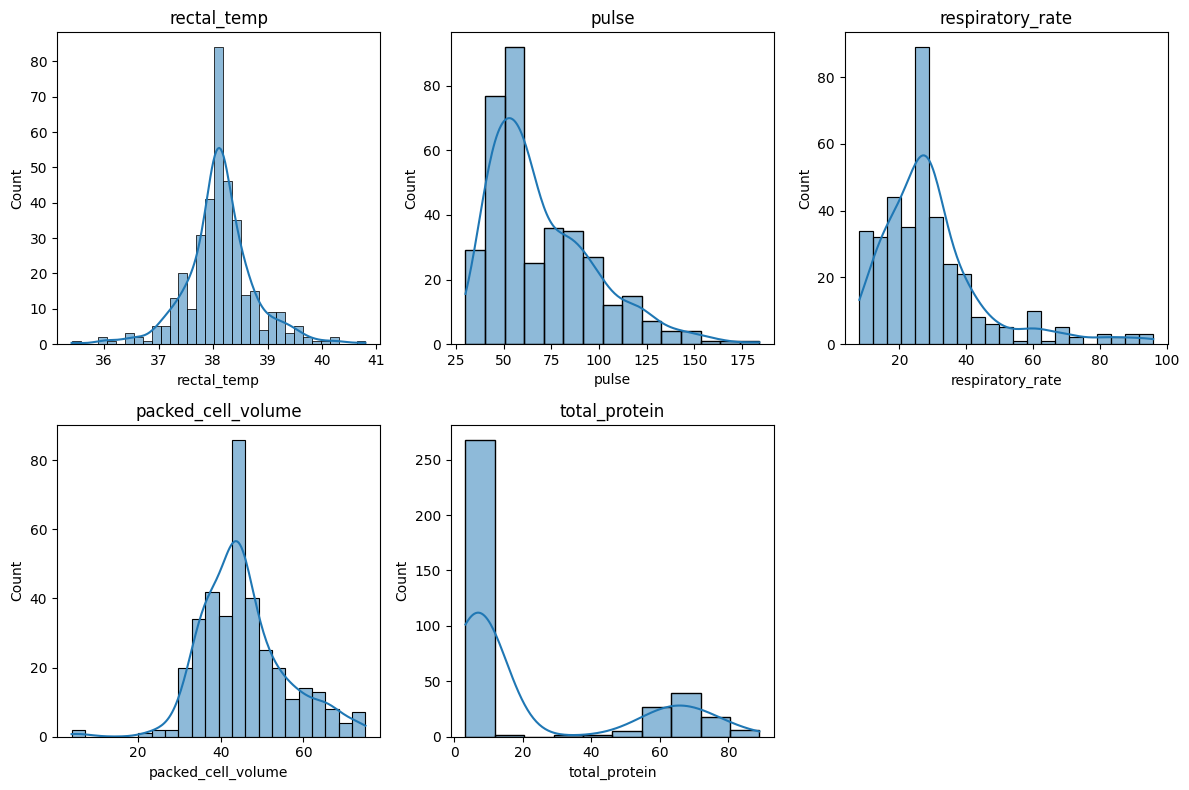

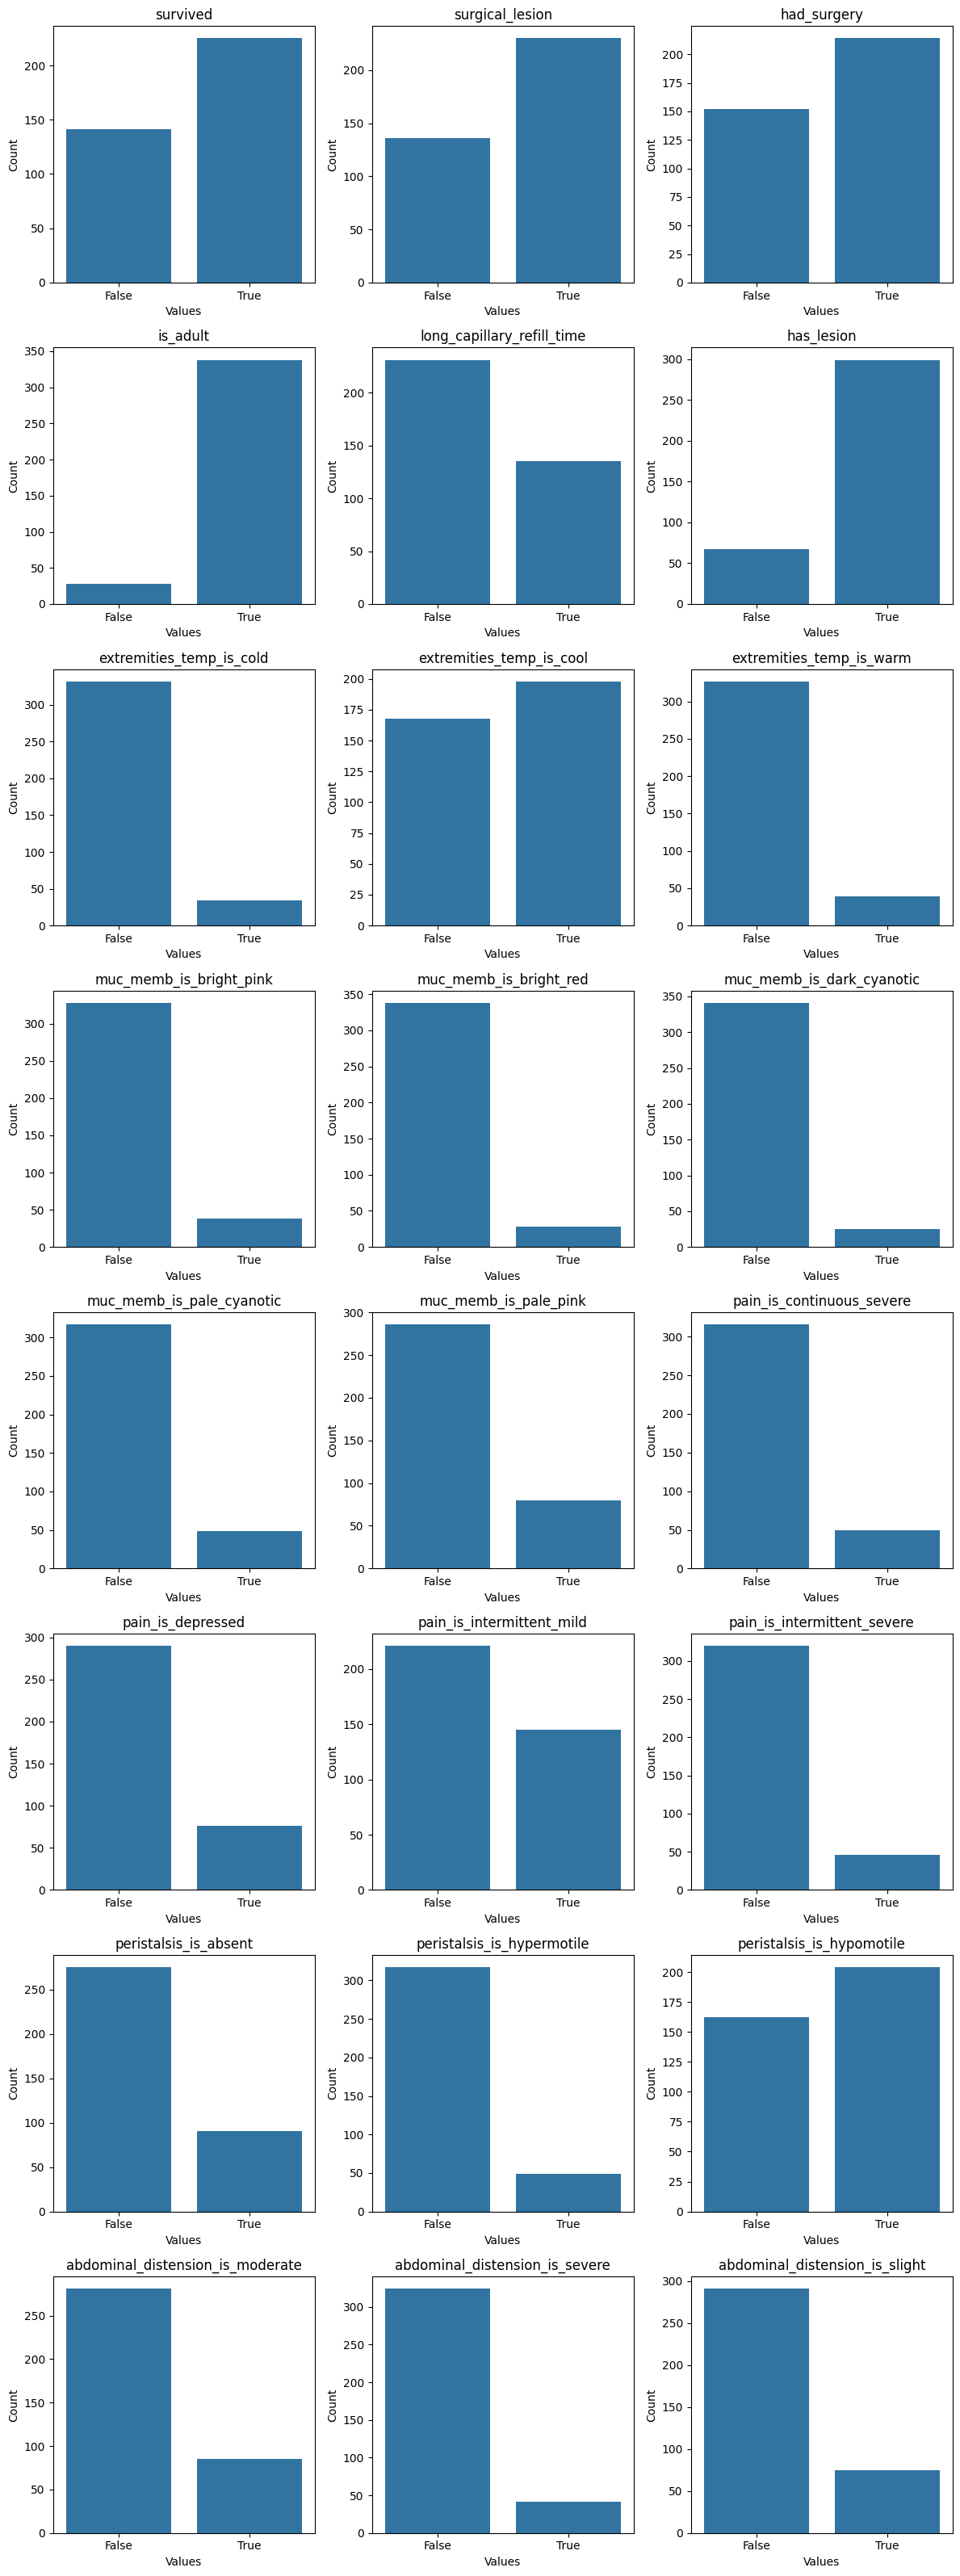

In [477]:
# Number of rows/columns
n_rows = 2
n_cols = 3

# Set up the matplotlib figure
plt.figure(figsize=(n_cols * 4, n_rows * 4))

# Loop through the numerical columns
for index, column in enumerate(df.select_dtypes(include=['number']).columns):
    plt.subplot(n_rows, n_cols, index + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'{column}')

# print(df['total_protein'].unique())

plt.tight_layout()
plt.show()

# Determine the number of boolean columns
num_features = df.select_dtypes(include=['bool']).shape[1]

# Set up the grid
n_cols = 3  # Max columns per row
n_rows = (num_features + n_cols - 1) // n_cols  # Calculate rows needed, rounding up

# Create a figure and axes with a subplot for each boolean feature
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))  # Adjust figsize as necessary

# Flatten the axes array if more than one row and column
axes = axes.flatten()

# Loop through the boolean columns and create a histogram for each
for i, col in enumerate(df.select_dtypes(include=['bool']).columns):
    ax = axes[i]  # Get the appropriate subplot axis
    sns.countplot(x=df[col], ax=ax)  # Plot the countplot/histogram
    ax.set_title(f'{col}')  # Set the title for each histogram
    ax.set_xlabel('Values')  # Set x-axis label
    ax.set_ylabel('Count')  # Set y-axis label

# Hide any unused axes if the number of plots is less than the number of subplots
for j in range(i + 1, n_rows * n_cols):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



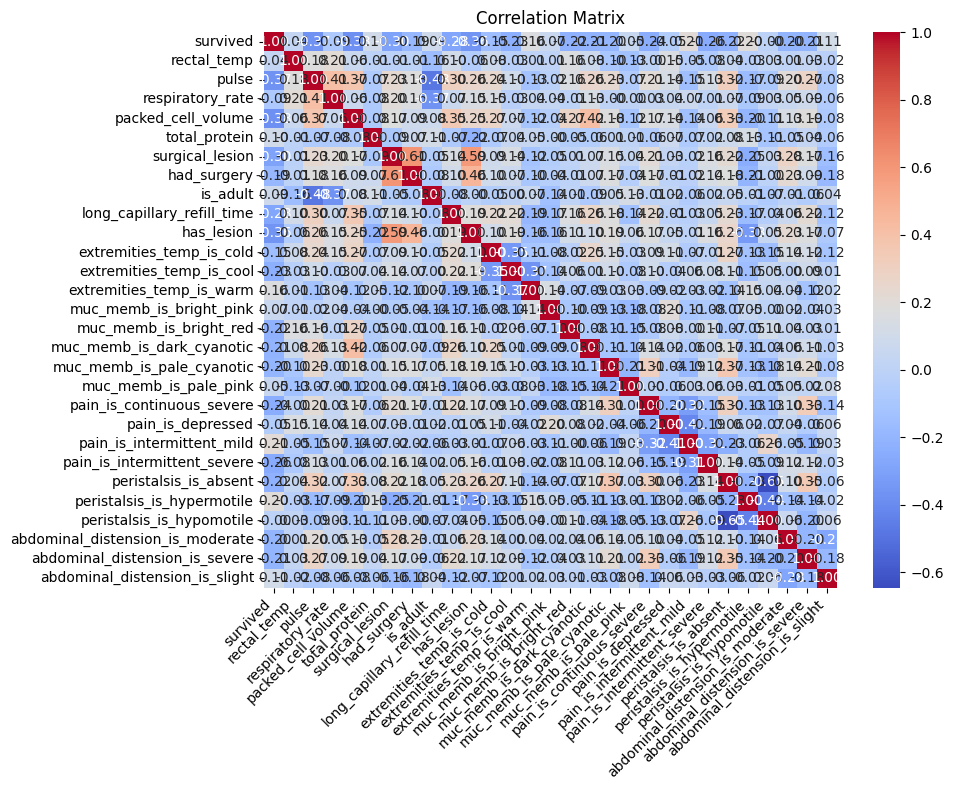

In [478]:
# Compute the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))  # Increase figure size to give more space

# Generate a heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            annot_kws={'size': 10})  # Increase font size for annotations

plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better fit
plt.yticks(rotation=0)  # Ensure y labels are horizontal for better readability
plt.tight_layout()  # Adjust the layout to make room for label rotation
plt.show()